In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as s
import matplotlib.patches as mpatches
import math
import csv
import os
import opendssdirect as dss
from opendssdirect.utils import run_command
import types

import inspect

In [2]:
# import win32com.client
# dssObj = win32com.client.Dispatch('OpenDSSEngine.DSS')
# DSSText = dssObj.Text
# DSSCircuit = dssObj.ActiveCircuit
# DSSSolution = DSSCircuit.Solution
# DSSElem = DSSCircuit.ActiveCktElement

In [3]:
# DSSText.Command = "CD c:\\Users\\william.brach\\Developer\\creating-microgrid-dataset\\opendss"

In [4]:
# DSSText.Command = "Compile 'microgrid.dss'"

In [5]:
#DSSText.Command='Plot Loadshape Object=officeLoad'
#DSSText.Command='Plot Loadshape Object=industrialParkLoad'
#DSSText.Command='Plot Loadshape Object=shopsLoad'

# DSSText.Command='Plot Loadshape Object=mveLoad'
# DSSText.Command='Plot Loadshape Object=fveLoad'
# DSSText.Command='Plot Loadshape Object=wpgLoad'


## Batery

In [6]:
# DSSText.Command= 'new storage.baterry bus=701 kV=0.4 Phases=3 kwRated=2000 kWhrated=50000 kWhstored=2000 vminpu=0.80 vmaxpu=1.20  %reserve=1  %effcharge=100   %effdischarge=100   %IdlingkW=0   enabled=yes';  
# DSSText.Command= 'new StorageController.scbattery element=Line.L1  Terminal=1 Elementlist=[baterry]  modedischarge=Peakshave kWTarget=20 modeCharge=PeakShaveLow kWTargetlow=0   InhibitTime=1';


## Monitors

In [7]:
# # load monitors
# DSSText.Command= 'New Monitor.metoffice  element=Load.officeBuilding  ppolar=no mode=65';
# DSSText.Command= 'New Monitor.metshops  element=Load.shops  ppolar=no mode=65';
# DSSText.Command= 'New Monitor.metpark element=Load.industrialPark  ppolar=no mode=65';
# DSSText.Command= 'New Monitor.trafo  element=Line.L1  ppolar=no mode=65';
# # batery monitor
# # DSSText.Command= 'New Monitor.baterry  element=storage.baterry   mode=3';


## Solution Settings

In [8]:
# # # DSSSolution.MaxControlIterations=1000;
# # # DSSSolution.maxiterations=1000;
# DSSText.Command = 'Set controlmode=time' ;
# DSSText.Command = 'Set mode=daily ';
# DSSText.Command = 'Set stepsize=15m';
# DSSText.Command = 'Set number=19968';
# # #Originalsteps=DSSSolution.Number
# # #Originalsteps

In [9]:
# DSSSolution.Solve();

## Plots

In [10]:
# #DSSText.Command = 'Plot monitor object=metoffice';
# #DSSText.Command = 'Plot monitor object=metshops';
# #DSSText.Command = 'Plot monitor object=metpark';
#DSSText.Command = 'Plot monitor object=trafo';

# #DSSText.Command = 'Export monitor object=metoffice';
# # DSSText.Command = 'Export monitor object=baterry';

In [11]:
# DSSText.Command = 'Plot monitor object=baterry channels=(2,3,4)';
# DSSText.Command = 'Plot monitor object=baterry channels=(1)';

In [12]:
grid = run_command('Redirect  C:\\Users\\william.brach\\Developer\\creating-microgrid-dataset\\opendss');

In [13]:
run_command("Compile 'microgrid.dss'")

''

# LOADS

In [14]:
# Loads
LOADS_ENABLED='Yes'
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='officeBuilding',
    bus='712',
    daily='officeLoad',
    enabled=LOADS_ENABLED
))
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='industrialPark',
    bus='705',
    daily='industrialParkLoad',
    enabled=LOADS_ENABLED
))
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='shops',
    bus='713',
    daily='shopsLoad',
    enabled=LOADS_ENABLED
))

''

# GENERATORS

In [15]:
GENERATORS_ENABLED='Yes'
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='fve',
    bus='705',
    daily='fveLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.02
))
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='mve',
    bus='701',
    daily='mveLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.06
))
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='wpg',
    bus='714',
    daily='wpgLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.06
))

''

# BATERY

In [16]:
dss.run_command('new storage.baterry bus=701 kV=0.4 Phases=3 kwRated=50 kWhrated=200 kWhstored=50 vminpu=0.80 vmaxpu=1.20  %reserve=1  %effcharge=100   %effdischarge=100   %IdlingkW=0   enabled=yes')
dss.run_command('new StorageController.scbattery element=Line.L1  Terminal=1 Elementlist=[baterry]  modedischarge=Peakshave kWTarget=20 modeCharge=PeakShaveLow kWTargetlow=0   InhibitTime=1')

''

# MONITORS

In [17]:
# load monitors
#New Monitor.metoffice  element=Load.officeBuilding  ppolar=no mode=65
# dss.run_command('New Monitor.{name}  element=Load.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
#     name='metoffice',
#     elementname='officeBuilding',
#     enabled='Yes'
# ))
# dss.run_command('New Monitor.{name}  element=Load.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
#     name='metshops',
#     elementname='shops',
#     enabled='Yes'
# ))
# dss.run_command('New Monitor.{name}  element=Load.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
#     name='metpark',
#     elementname='industrialPark',
#     enabled='Yes'
# ))
dss.run_command('New Monitor.{name}  element=Line.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
    name='trafo',
    elementname='L1',
    enabled='Yes'
))
dss.run_command('New Monitor.baterry  element=storage.baterry   mode=3')

''

In [18]:
dss.run_command('Set controlmode=time')
dss.run_command('Set mode=daily ')
dss.run_command('Set stepsize=15m')
dss.run_command('Set number=2880')

''

In [19]:
dss.run_command('Solve');

In [20]:
x = dss.run_command('Export monitor object=trafo')
batery = dss.run_command('Export monitor object=baterry')

In [21]:
batery

'C:\\Users\\william.brach\\Developer\\Microgrid-cerebrum\\opendss\\baterka_Mon_baterry.csv'

In [22]:
df = pd.read_csv(x)
batery = pd.read_csv(batery)

In [23]:
df.columns

Index(['hour', ' t(sec)', ' P1 (kW)', ' Q1 (kvar)'], dtype='object')

In [24]:
priceDf = pd.read_csv("price.csv",delimiter=';')
price = priceDf[priceDf['Delivery day'] == '2.4.2021']['Price (€/MWh)']
price = price.append(price)
price = price.append(price)
price = price.sort_index().reset_index().drop(columns={'index'})['Price (€/MWh)']

In [25]:
# from matplotlib import cm
# ax = plt.plot(range(0,96),kw.T,alpha=0.1,color="red")
# #ax = plt.plot(range(0,96),kwGenerator.T,alpha=0.1,color="green")

In [66]:
b_in

0     50.0005
1      0.0000
2      0.0000
3      0.0000
4      0.0000
       ...   
91    49.9998
92    50.0003
93    49.9999
94    49.9995
95    50.0001
Name: kWIn, Length: 96, dtype: float64

In [141]:
kw = df[' P1 (kW)'][2*96:(2+1)*96]
b = batery['kWOut'][2*96:(2+1)*96]
b_in = batery['kWIn'][2*96:(2+1)*96]
b_in[1:5] = 50
b_in.index = range(0,96)
b.index = range(0,96)
kw.index = range(0,96)
plus = kw[kw > 0]
minus = kw[kw <= 0].multiply(-1)
b = b.multiply(1)

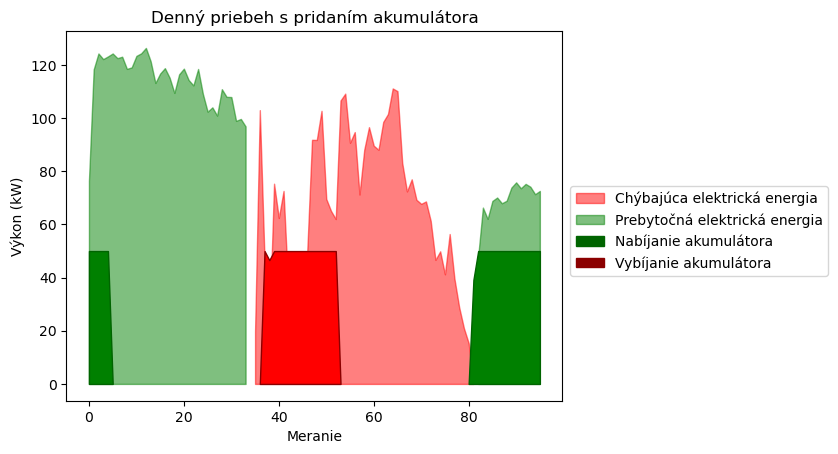

In [144]:
import matplotlib.pyplot as plt

p1 = plt.fill_between(plus.index,plus, 0, alpha=0.5,color="red")
p2 = plt.fill_between(minus.index[:34],minus[:34], 0, alpha=0.5,color="green")
p3 = plt.fill_between(minus.index[35:],minus[35:], 0, alpha=0.5,color="green")
p4 = plt.fill_between(b.index[36:54],b[36:54],alpha=1,facecolor="red",edgecolor="darkred", linewidth=1.0)

p6 = plt.fill_between(b_in.index[80:],b_in[80:],alpha=1,facecolor="green",edgecolor="darkgreen", linewidth=1.0)
p5 = plt.fill_between(b_in.index[:6],b_in[:6],alpha=1,facecolor="green",edgecolor="darkgreen", linewidth=1.0)

red_patch = mpatches.Patch(color='red',alpha=0.5, label='Chýbajúca elektrická energia')
green_patch = mpatches.Patch(color='green',alpha=0.5, label='Prebytočná elektrická energia')
darkgreen_patch = mpatches.Patch(color='darkgreen', label='Nabíjanie akumulátora')
darkred_patch = mpatches.Patch(color='darkred', label='Vybíjanie akumulátora')
plt.legend(handles=[red_patch,green_patch, darkgreen_patch, darkred_patch],bbox_to_anchor = (1.55, 0.6))

plt.xlabel("Meranie")
plt.ylabel("Výkon (kW)")
plt.title("Denný priebeh s pridaním akumulátora")
plt.savefig("graf_2.png")
plt.show()


In [135]:
run_command("Compile 'microgrid.dss'")
# Loads
LOADS_ENABLED='Yes'
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='officeBuilding',
    bus='712',
    daily='officeLoad',
    enabled=LOADS_ENABLED
))
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='industrialPark',
    bus='705',
    daily='industrialParkLoad',
    enabled=LOADS_ENABLED
))
dss.run_command('New Load.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98  daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='shops',
    bus='713',
    daily='shopsLoad',
    enabled=LOADS_ENABLED
))
GENERATORS_ENABLED='Yes'
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='fve',
    bus='705',
    daily='fveLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.02
))
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='mve',
    bus='701',
    daily='mveLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.06
))
dss.run_command('New Generator.{name} Bus1={bus} Phases=3 Conn=wye Model=1 kV=0.4  pf=0.98 kw={kw} daily={daily} Vminpu=0.5 Vmaxpu=3 enabled={enabled}'.format(
    name='wpg',
    bus='714',
    daily='wpgLoad',
    enabled=GENERATORS_ENABLED,
    kw=0.06
))

dss.run_command('New Monitor.{name}  element=Line.{elementname}  ppolar=no mode=65 enabled={enabled}'.format(
    name='trafo',
    elementname='L1',
    enabled='Yes'
))
dss.run_command('Set controlmode=time')
dss.run_command('Set mode=daily ')
dss.run_command('Set stepsize=15m')
dss.run_command('Set number=2880')
dss.run_command('Solve');
x = dss.run_command('Export monitor object=trafo')
df2 = pd.read_csv(x)

In [136]:
df2

,hour,t(sec),P1 (kW),Q1 (kvar)
0,0,900.0,-89.9159,-17.4160
1,0,1800.0,-107.7780,-20.9735
2,0,2700.0,-107.6190,-20.9543
3,1,0.0,-106.7980,-20.7913
4,1,900.0,-99.3031,-19.1889
...,...,...,...,...
2875,719,0.0,-121.8120,-23.7726
2876,719,900.0,-116.6560,-22.7551
2877,719,1800.0,-117.5060,-22.9126
2878,719,2700.0,-121.3770,-23.6881


In [145]:
kw = df2[' P1 (kW)'][2*96:(2+1)*96]
kw.index = range(0,96)
plus = kw[kw > 0]
minus = kw[kw <= 0].multiply(-1)

In [133]:
kw

0     6.386330e-12
1     6.386330e-12
2     6.386330e-12
3     6.386330e-12
4     6.386330e-12
          ...     
91    6.386330e-12
92    6.386330e-12
93    6.386330e-12
94    6.386330e-12
95    6.386330e-12
Name:  P1 (kW), Length: 96, dtype: float64

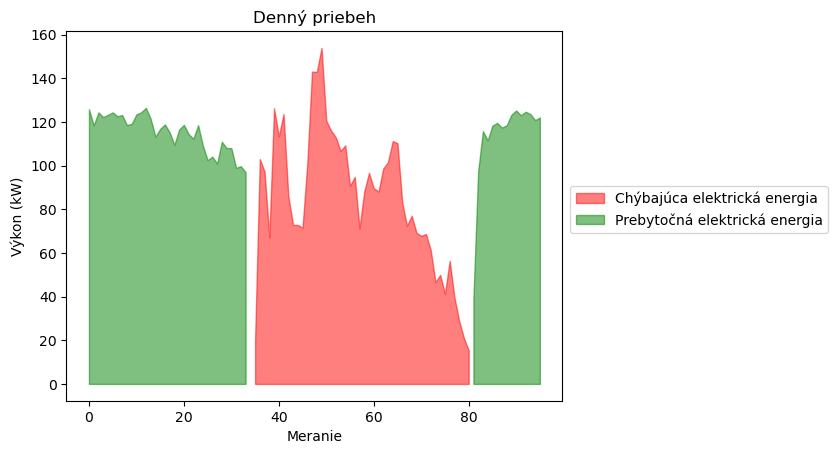

In [146]:



p1 = plt.fill_between(plus.index,plus, 0, alpha=0.5,color="red")
p2 = plt.fill_between(minus.index[:34],minus[:34], 0, alpha=0.5,color="green")
p3 = plt.fill_between(minus.index[35:],minus[35:], 0, alpha=0.5,color="green")

red_patch = mpatches.Patch(color='red',alpha=0.5, label='Chýbajúca elektrická energia')
green_patch = mpatches.Patch(color='green',alpha=0.5, label='Prebytočná elektrická energia')
plt.legend(handles=[red_patch,green_patch],bbox_to_anchor = (1.55, 0.6))

plt.xlabel("Meranie")
plt.ylabel("Výkon (kW)")
plt.title("Denný priebeh")
plt.savefig("graf_1.png")
plt.show()
